In [71]:
import sys
import random
import math

In [72]:
import wolframclient as wl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sympy import *
from sympy.plotting import plot
import networkx as nx
import pydot

In [73]:
from IPython.display import Image

In [74]:
#28 var
#F(x1) = {x2,x3}, F(x2) = {x5,x6}, F(x3) = {x2,x4,x6}, F(x4) = {x6}, F(x5) = {x8}, F(x6) = {x5,x7,x8}, F(x7) = {x8}, F(x8) = 0

In [75]:
#Соединяем точки рёбрами быстро

G = nx.DiGraph()

nodes = [1, 2, 3, 4, 5, 6, 7, 8]
edges = [(1,2), (1,3), (2,5), (2,6), (3,2), (3,4), (3,6), (4,6), (5,8), (6,5), (6,7), (6,8), (7,8)]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [76]:
#Второе аналитическое представление

edges

[(1, 2),
 (1, 3),
 (2, 5),
 (2, 6),
 (3, 2),
 (3, 4),
 (3, 6),
 (4, 6),
 (5, 8),
 (6, 5),
 (6, 7),
 (6, 8),
 (7, 8)]

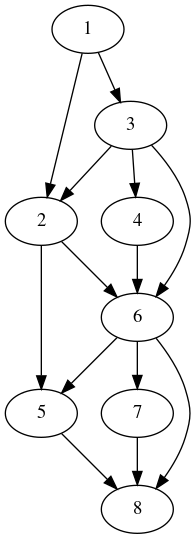

In [88]:
#Геометрическое представление
#Pydot

A = nx.nx_pydot.to_pydot(G)
A.write_png('example2_graph.png')
G = nx.nx_pydot.from_pydot(A) # return MultiGraph
Image("example2_graph.png")

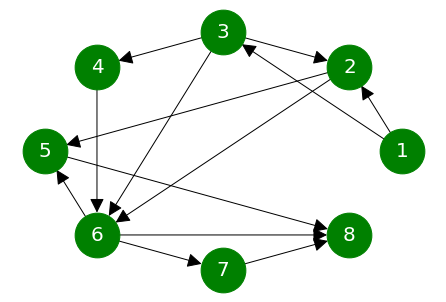

In [77]:
#Геометрическое представление
#Matplotlib

nx.draw_circular(G,
        node_color = "green",
        node_size = 2000, 
        with_labels = True,
        arrowsize = 30,
        font_color = "white",
        font_size = 20
        )

In [78]:
#Матрица смежности

matrix_smej = nx.adjacency_matrix(G)
Matrix(matrix_smej.toarray())

Matrix([
[0, 1, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 1, 0, 0],
[0, 1, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 1, 0, 1, 1],
[0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 0]])

In [79]:
#Матрица инцидентности

matrix_inc = -nx.incidence_matrix(G, oriented=True)
mi = matrix_inc.toarray().transpose()
Matrix(mi)

Matrix([
[1.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[1.0,  0.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[0.0,  1.0,  0.0,  0.0, -1.0,  0.0,  0.0,  0.0],
[0.0,  1.0,  0.0,  0.0,  0.0, -1.0,  0.0,  0.0],
[0.0, -1.0,  1.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[0.0,  0.0,  1.0, -1.0,  0.0,  0.0,  0.0,  0.0],
[0.0,  0.0,  1.0,  0.0,  0.0, -1.0,  0.0,  0.0],
[0.0,  0.0,  0.0,  1.0,  0.0, -1.0,  0.0,  0.0],
[0.0,  0.0,  0.0,  0.0,  1.0,  0.0,  0.0, -1.0],
[0.0,  0.0,  0.0,  0.0, -1.0,  1.0,  0.0,  0.0],
[0.0,  0.0,  0.0,  0.0,  0.0,  1.0, -1.0,  0.0],
[0.0,  0.0,  0.0,  0.0,  0.0,  1.0,  0.0, -1.0],
[0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  1.0, -1.0]])

In [80]:
#Список смежности

a = {}

for i in G.nodes():
    a[i] = []
    for j in G.edges():
        if(j[0]==i):
            a[i].append(j[1])
            
df = pd.DataFrame(a.items())
print(df.to_string(index=False, header=False))

 1     [2, 3]
 2     [5, 6]
 3  [2, 4, 6]
 4        [6]
 5        [8]
 6  [5, 7, 8]
 7        [8]
 8         []


In [81]:
#Степени

gxp = []
for i in G.nodes():
    gxp.append((i,len(G.out_edges(i))))
    
gxm = []
for i in G.nodes():
    gxm.append((i,len(G.in_edges(i))))

gx = nx.degree(G)
gxp = pd.merge(pd.DataFrame(gxp), pd.DataFrame(gxm), on=0)
gx = pd.merge(pd.DataFrame(gxp), pd.DataFrame(gx), on=0)
gx.columns = ["x","g+(x)","g-(x)","g(x)"]

print(gx.to_string(index=False))

 x  g+(x)  g-(x)  g(x)
 1      2      0     2
 2      2      2     4
 3      3      1     4
 4      1      1     2
 5      1      2     3
 6      3      3     6
 7      1      1     2
 8      0      3     3


In [82]:
#Классификация

for i in G.nodes():
    isolated = 1
    drain = 1
    source = 1
    
    for j in G.edges():
        if(i in j):
            isolated = 0
            break
    for j in G.edges():
        if(isolated == 0 and i == j[0]):
            drain = 0
            break
    for j in G.edges():
        if(isolated == 0 and i != j[0] and i == j[1]):
            source = 0
            break
    
    if(isolated==1):
        print("X"+str(i)+": Изолированный")
    elif(drain==1):
        print("X"+str(i)+": Приём")
    elif(source==1):
        print("X"+str(i)+": Источник")
    else:
        print("X"+str(i)+": Промежуточный")
    

knots = []
for i in G.edges():
    if( tuple([i[1],i[0]]) in G.edges() ):
        #knots.append(i)
        knots.append(i[0])
print("Узлы: " + str(knots))

X1: Источник
X2: Промежуточный
X3: Промежуточный
X4: Промежуточный
X5: Промежуточный
X6: Промежуточный
X7: Промежуточный
X8: Приём
Узлы: []


In [83]:
#Петли

for i in G.edges():
    if(i in nx.selfloop_edges(G)):
        print(i)
else:
    print("Нет петлей")

Нет петлей


In [84]:
#Вершины смежности

vertice = 5

a = {}

a = {vertice:[]}
for j in G.edges():
    if(j[0]==vertice):
        a[vertice].append(j[1])
    if(j[1]==vertice):
        a[vertice].append(j[0])
            
df = pd.DataFrame(a.items())
print(df.to_string(index=False, header=False))

 5  [2, 8, 6]


In [85]:
#Ребра инцидентности

edge = 4

b = {}
for i in G.edges():
    if(edge in i):
        b["u"+str(list(G.edges()).index(i))] = i
        
df = pd.DataFrame(b.items())
print(df.to_string(index=False, header=False))

 u5  (3, 4)
 u7  (4, 6)


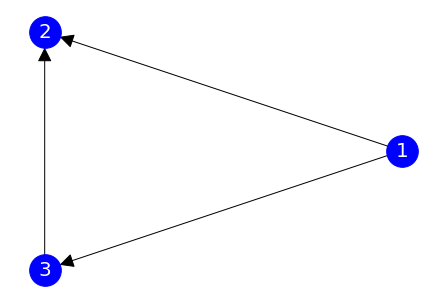

In [86]:
#Подграф

sg = 1
nodes = [sg]
for i in G.edges():
    if(sg==i[0]):
        nodes.append(i[1])
    if(sg==i[1]):
        nodes.append(i[0])
        
nodes2 = set(G.nodes()).difference(nodes)

subgraph1 = G.subgraph(nodes)
subgraph2 = G.subgraph(nodes2)

nx.draw_circular(subgraph1,
        node_color = "blue",
        node_size = 1000, 
        with_labels = True,
        arrowsize = 30,
        font_color = "white",
        font_size = 20
        )

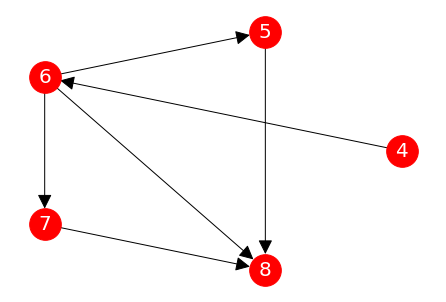

In [87]:
nx.draw_circular(subgraph2,
        node_color = "red",
        node_size = 1000, 
        with_labels = True,
        arrowsize = 30,
        font_color = "white",
        font_size = 20
        )